In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
%matplotlib inline
import math

In [2]:
def generate_data(size, dim = 3):
    mu_vec = np.random.rand(dim)
    cov_mat = np.random.rand(dim, dim)
    return np.random.multivariate_normal(mu_vec, cov_mat, size).T    
def norm(data):
    m = np.reshape(np.mean(data, axis = 1), (3, 1))
    s = np.std(data)
    return (data - m)/s

In [9]:
data = generate_data(40, 3)

C:\Users\Hradi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: covariance is not positive-semidefinite.
  after removing the cwd from sys.path.


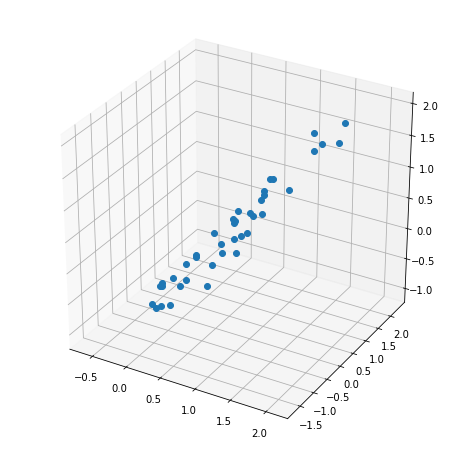

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[0], data[1], data[2], 'o')
plt.show()
data = norm(data)

In [13]:
def pca(data, desired_dimension = 2):
    dim = len(data)
    size = len(data[0])
    if dim < desired_dimension:
        raise Exception('Desired dimension is biggest then dimension of data')
    if dim == desired_dimension:
        return data
    
    means = np.array([[0]*dim], dtype=float)
    for i in np.arange(dim):
        means[0][i] = np.mean(data[i])
    mean_vec = means.T
    
    covariance_matrix = np.zeros((dim, dim))
    for i in np.arange(size):
        tmp_vector = data[:, i].reshape(3, 1) - mean_vec
        covariance_matrix += tmp_vector.dot(tmp_vector.T)
    covariance_matrix /= size-1
    
    eigen_val, eigen_vec = np.linalg.eig(covariance_matrix)
    eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:, i]) for i in np.arange(len(eigen_val))]
    eigen_pairs.sort(key = lambda x:x[0], reverse=True)
    matrix_w = np.zeros((desired_dimension, dim))
    for i in np.arange(desired_dimension):
        matrix_w[i] = eigen_pairs[i][1]
    
    return matrix_w.dot(data)

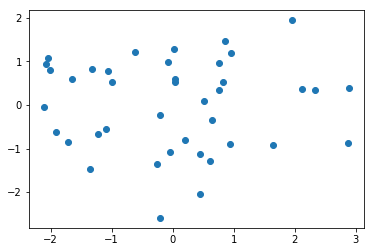

In [14]:
new_data = pca(data, 2)
plt.plot(new_data[0], new_data[1], 'o')

In [15]:
def psa2(data, desired_dimension = 2):   #SVD
    dim = len(data)
    size = len(data[0])
    if dim < desired_dimension:
        raise Exception('Desired dimension is biggest then dimension of data')
    if dim == desired_dimension:
        return data
    
    U, s, V = np.linalg.svd(data, full_matrices=True)
    ind = np.argsort(-s)
    matrix_w = np.zeros((desired_dimension, dim))
    for i in np.arange(desired_dimension):
        matrix_w[i] = V[ind[i]]
    
    return matrix_w.dot(data)

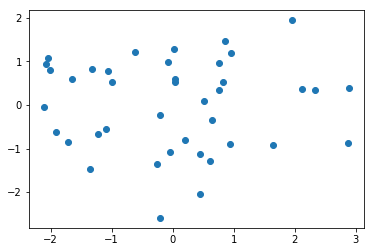

In [16]:
new_data = pca(data, 2)
plt.plot(new_data[0], new_data[1], 'o')